In [2]:
import math
import cv2
import csv
import h5py
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [14]:
def getDateTimeStr():
    return datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

2024-05-02_19-36-29


In [51]:
filename = "../../datasets/muenster_dataset/wacv2024_ictrap_dataset/1_l-l-l.h5"

with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    # a_group_key = list(f.keys())[0]

    # # get the object type for a_group_key: usually group or dataset
    # print(type(f[a_group_key])) 

    # # If a_group_key is a group name, 
    # # this gets the object names in the group and returns as a list
    # data = list(f[a_group_key])

    # # If a_group_key is a dataset name, 
    # # this gets the dataset values and returns as a list
    # data = list(f[a_group_key])
    # # preferred methods to get dataset values:
    # ds_obj = f[a_group_key]      # returns as a h5py dataset object
    # # ds_arr = f[a_group_key][()]  # returns as a numpy array

    print("\nCD/events")
    events = f["CD/events"]
    print(len(events)) # 13848396
    for i in range(10):
        print(events[i]) # (133, 716, 1, 1475064)
    # print last event
    print("last event:", events[-1])
    # print types
    for element in events[0]:
        print(element, type(element))


    print("\nEXTERNAL_TRIGGERS/events")
    events = f["EXTERNAL_TRIGGERS/events"]
    print(len(events))
    for i in range(10):
        print(events[i])
    print("last event:", events[-1])

    print("\nEXTERNAL_TRIGGERS/corrected_negative")
    events = f["EXTERNAL_TRIGGERS/corrected_negative"]
    print(len(events))
    for i in range(10):
        print(events[i])
    print("last event:", events[-1])

    print("\nEXTERNAL_TRIGGERS/corrected_positive")
    events = f["EXTERNAL_TRIGGERS/corrected_positive"]
    print(len(events))
    for i in range(10):
        print(events[i])
    print("last event:", events[-1])


Keys: <KeysViewHDF5 ['CD', 'EXTERNAL_TRIGGERS']>

CD/events
13848396
(133, 716, 1, 1475064)
(127, 707, 1, 1475084)
(0, 605, 1, 1475126)
(590, 162, 1, 1475157)
(59, 654, 1, 1475295)
(82, 676, 1, 1475309)
(66, 538, 1, 1475311)
(64, 658, 1, 1475324)
(123, 704, 1, 1475342)
(90, 678, 1, 1475349)
last event: (650, 91, 0, 156909510)
133 <class 'numpy.uint16'>
716 <class 'numpy.uint16'>
1 <class 'numpy.int8'>
1475064 <class 'numpy.int64'>

EXTERNAL_TRIGGERS/events
31361
(1, 1475011, 0)
(0, 1476011, 0)
(1, 1485013, 0)
(0, 1486012, 0)
(1, 1495014, 0)
(0, 1496007, 0)
(1, 1505009, 0)
(0, 1506008, 0)
(1, 1515010, 0)
(0, 1516003, 0)
last event: (1, 156909843, 0)

EXTERNAL_TRIGGERS/corrected_negative
15546
(0, 1476011, 0, 0)
(0, 1486012, 0, 1)
(0, 1496007, 0, 2)
(0, 1506008, 0, 3)
(0, 1516003, 0, 4)
(0, 1526004, 0, 5)
(0, 1535999, 0, 6)
(0, 1546000, 0, 7)
(0, 1556002, 0, 8)
(0, 1565996, 0, 9)
last event: (0, 156901395, 0, 15545)

EXTERNAL_TRIGGERS/corrected_positive
15547
(1, 1475011, 0, -1)
(1, 1485

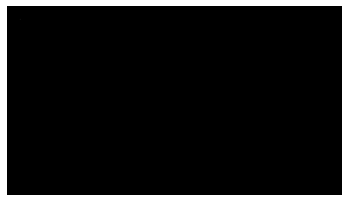

In [3]:
# timestamp ist in Mikrosekunden
mikros_per_frame_100fps = (1 / 100) * 1000 * 1000
print(mikros_per_frame_100fps)

width = 1280
height = 720
image = [[(0,0,0) for _ in range(width)] for _ in range(height)]

image[50][50] = (255,255,255)

# Display the image
plt.imshow(image)
plt.axis('off') 
plt.show()

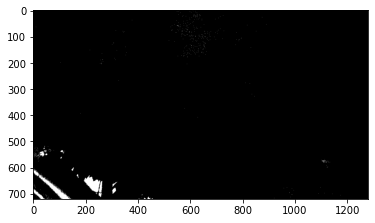

In [35]:
image = np.zeros((height, width, 1), dtype = np.uint8)

with h5py.File(filename, "r") as f:
    events = f["CD/events"]
    i = 0
    for event in events:
        # event zB (133, 716, 1, 1475064)
        image[event[1],event[0]] = 255
        i+=1
        if i > 10000:
            break
        
plt.imshow(image, cmap="gray")
plt.show()

## Create test video

In [42]:
fps = 100
video = cv2.VideoWriter('test.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

# Create a loop to generate frames
for i in range(100):  # Generating 100 frames
    # Create a blank frame
    frame = np.zeros((height, width, 3), dtype=np.uint8)
    
    # Draw something on the frame (for example, a rectangle moving horizontally)
    x = int(i * (width / 100))  # Calculate x-coordinate based on frame number
    cv2.rectangle(frame, (x, 100), (x + 50, 200), (0, 255, 0), -1)  # Draw a green rectangle
    
    # Write the frame to the video file
    video.write(frame)

# Release the VideoWriter
video.release()

print("Video created successfully!")


Video created successfully!


## Create video from events

In [6]:
fps = 100

# events_filename = "1_l-l-l"
filename = "3_m-h-h"
events_filepath = f"../../datasets/muenster_dataset/wacv2024_ictrap_dataset/{filename}.h5"

video_filepath = f"{filename}_{getDateTimeStr()}.mp4"

In [47]:
video = cv2.VideoWriter(video_filepath, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

i = 0
# event zB (133, 716, 1, 1475064)
with h5py.File(events_filepath, "r") as f:
    events = f["CD/events"]
    frame = np.zeros((height, width, 3), dtype=np.uint8)
    frame_start = events[0][3]
    video_start = frame_start

    for event in events:
        timestamp = event[3]
        if timestamp >= frame_start + mikros_per_frame_100fps:
            # event is part of next frame
            frame_start = timestamp
            # write current frame to video
            video.write(frame)
            # start new frame
            frame = np.zeros((height, width, 3), dtype=np.uint8)
        # draw event
        frame[event[1],event[0]] = 255

        # if video_start+1000*1000*20 < timestamp:
        #     # stop after 20s
        #     break

# Release the VideoWriter
video.release()

print(f"Created video {video_filepath}!")

Created video 3_m-h-h_2024-05-02_16-32-02.mp4!


## Read csv test

In [9]:
# Open the CSV file
labels_filepath = f"../../datasets/muenster_dataset/wacv2024_ictrap_dataset/{filename}_annotation.csv"

with open(labels_filepath, 'r') as cvs_file:
    # Create a CSV reader object
    reader = csv.DictReader(cvs_file)
    
    # Iterate over each row in the CSV file
    i = 0
    for row in reader:
        # Each row is a dictionary
        print(row)
        i+=1
        if i>5:
            break


{'frame_index': '0', 'is_keyframe': 'True', 'class': 'insect', 'confidence': 'certain', 'left': '638.4', 'top': '83.39999999999999', 'width': '32.4', 'height': '31.799999999999997', 'center_x': '654.6', 'center_y': '99.3'}
{'frame_index': '0', 'is_keyframe': 'True', 'class': 'insect', 'confidence': 'certain', 'left': '345.59999999999997', 'top': '151.79999999999998', 'width': '15.6', 'height': '14.399999999999999', 'center_x': '353.4', 'center_y': '159.0'}
{'frame_index': '1', 'is_keyframe': 'False', 'class': 'insect', 'confidence': 'certain', 'left': '635.85', 'top': '83.25', 'width': '32.4', 'height': '31.799999999999997', 'center_x': '652.05', 'center_y': '99.14999999999999'}
{'frame_index': '1', 'is_keyframe': 'False', 'class': 'insect', 'confidence': 'certain', 'left': '345.8', 'top': '150.19999999999996', 'width': '15.799999999999955', 'height': '14.799999999999994', 'center_x': '353.7', 'center_y': '157.6'}
{'frame_index': '2', 'is_keyframe': 'False', 'class': 'insect', 'confide

## Load video and draw BBoxes

In [27]:
# filename = "3_m-h-h"
filename = "1_l-l-l"

labels_filepath = f"../../datasets/muenster_dataset/wacv2024_ictrap_dataset/{filename}_annotation.csv"
input_video_path = f"../../datasets/muenster_dataset/wacv2024_ictrap_dataset/{filename}_dvs.mp4"
output_video_path = f"output/{filename}_dvs_bb_{getDateTimeStr()}.mp4"

with open(labels_filepath, 'r') as cvs_file:
    # Read bboxes
    reader = csv.DictReader(cvs_file)

    # Open the input video file
    cap = cv2.VideoCapture(input_video_path)

    # Check if the video opened successfully
    if not cap.isOpened():
        raise Exception("Error: Could not open video.")

    # Get video properties
    input_fps = int(cap.get(cv2.CAP_PROP_FPS))
    input_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    input_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Offset and scale of label coordinates (should usually be offset=0 and scale=1).
    # For drawing BBs on the RGB video
    # offset_x = 250
    # offset_y = 150
    # scale_x = 3.3
    # scale_y = 3.3
    offset_x = 0
    offset_y = 0
    scale_x = 1
    scale_y = 1

    # Define the output video codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, input_fps, (input_width, input_height))

    annotation_row = next(reader, None) # return None if eof

    frame_index = 0

    # Iterate frames
    while cap.isOpened():
        ret, frame = cap.read()  # Read a frame
        if not ret:
            break  # Break the loop if no frame is read (end of video)

        while annotation_row is not None:
            label_frame_index = int(annotation_row["frame_index"])
            if label_frame_index > frame_index:
                # If the label frame index is for a future video frame
                break
            if label_frame_index == frame_index:
                # If label frame index matches video frame index: Draw BB
                x1 = int(offset_x + float(annotation_row["left"]))
                y1 = int(offset_y + float(annotation_row["top"]))
                x2 = int(x1 + float(annotation_row["width"]) * scale_x)
                y2 = int(y1 + float(annotation_row["height"]) * scale_y)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            else:
                # label_frame_index < frame_index
                # Iterate until matching frame has been found
                pass
            annotation_row = next(reader, None)
        
        # Write the processed frame to the output video
        out.write(frame)
        frame_index += 1

        if frame_index/input_fps > 10:
            # stop after x seconds
            break

    # Release the video capture and writer objects
    cap.release()
    out.release()

    print(f"Created video {output_video_path}!")

FileNotFoundError: [Errno 2] No such file or directory: '../../datasets/muenster_dataset/wacv2024_ictrap_dataset/1_l-l-l_annotation_instances.csv'

In [3]:
# iter test

l = [1,2,3,4,5]

# li = iter(l)
print("before", next(l))

for x in l:
    print(x)



TypeError: 'list' object is not an iterator

## Inspect frame times

In [3]:
filename = "3_m-h-h"
events_filepath = f"../../datasets/muenster_dataset/wacv2024_ictrap_dataset/{filename}.h5"

min_ft = 999999999
max_ft = 0
ft_sum = 0
triggers_processed = 1

with h5py.File(events_filepath, "r") as events_file:
    triggers = events_file["EXTERNAL_TRIGGERS/corrected_positive"] # (p, t, channel_id, frame_index)

    prev_t = int(triggers[0][1])

    for trigger in triggers[1:]:
        trigger_t = int(trigger[1])
        trigger_frame_index = int(trigger[3])

        delta_t = trigger_t - prev_t
        if delta_t > max_ft:
            max_ft = delta_t
        if delta_t < min_ft:
            min_ft = delta_t

        ft_sum += delta_t

        prev_t = trigger_t
        triggers_processed += 1

# print mean, min and max frame time (duration)
print(ft_sum/triggers_processed, min_ft, max_ft)
# -> 19811.611436235064 10298 21627

19811.611436235064 10298 21627
